In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\pkmra_fk94jjw\\Downloads\\USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Data preprocessing

In [6]:
df=df.drop(['Address'],axis=1)
#Checking Outliers
X=df.drop(['Price'],axis=1)
y=df['Price']

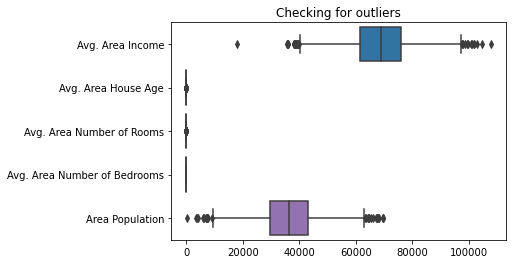

In [7]:
sns.boxplot(data=X,orient = 'h')
plt.title('Checking for outliers')
plt.show()

# Data splitting and training 

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
lr.intercept_

-2636052.405028796

In [12]:
y_pred = lr.predict(X_test)
y_pred

array([1308974.61032602, 1237616.08059037, 1244388.42194101,
       1230101.05996504, 1061072.33717799, 1543431.49363639,
       1096022.80756648,  833570.17046971,  789533.95400679,
       1469428.54560216,  671507.62595623, 1604959.00593795,
       1004968.50945305, 1799335.91199236, 1287734.54787407,
       1088689.98577205, 1423745.58270439, 1077816.43247694,
        802563.98973297,  930650.12633556, 1134427.91072655,
        915905.11866939, 1489100.86127084, 1285162.01577587,
       1581723.66398572, 1132865.81367054, 1090651.44049935,
        974726.39455225,  925263.95378553, 1740223.81329833,
       1287620.25286491, 1621720.6782438 , 1435666.53097628,
       1234554.05858166, 1485892.57840726, 1716902.47445758,
       1537666.08237531,  778311.07858797, 1764624.47477066,
       1175792.85133884, 1553020.00319877,  897769.3207082 ,
       1372249.62089571,  845289.9890355 , 1201057.7372121 ,
       1132618.25733459, 1364337.63208634, 1450743.58152997,
       1574465.50883135,

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

10324589581.306145
0.9181637728257601


In [14]:
y_pred

array([1308974.61032602, 1237616.08059037, 1244388.42194101,
       1230101.05996504, 1061072.33717799, 1543431.49363639,
       1096022.80756648,  833570.17046971,  789533.95400679,
       1469428.54560216,  671507.62595623, 1604959.00593795,
       1004968.50945305, 1799335.91199236, 1287734.54787407,
       1088689.98577205, 1423745.58270439, 1077816.43247694,
        802563.98973297,  930650.12633556, 1134427.91072655,
        915905.11866939, 1489100.86127084, 1285162.01577587,
       1581723.66398572, 1132865.81367054, 1090651.44049935,
        974726.39455225,  925263.95378553, 1740223.81329833,
       1287620.25286491, 1621720.6782438 , 1435666.53097628,
       1234554.05858166, 1485892.57840726, 1716902.47445758,
       1537666.08237531,  778311.07858797, 1764624.47477066,
       1175792.85133884, 1553020.00319877,  897769.3207082 ,
       1372249.62089571,  845289.9890355 , 1201057.7372121 ,
       1132618.25733459, 1364337.63208634, 1450743.58152997,
       1574465.50883135,

# KNN Regression 

In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1223934.13503708, 1056119.50788413, 1145501.44199807,
        993093.84009504, 1450618.31577999, 1564654.30674495,
        715270.78170081,  994508.22245455,  890150.31874084,
       1533244.00959826,  959424.90143308, 1694483.99036022,
       1044703.96895191, 1091809.39635504, 1427343.25453385,
        899756.06972656, 1274500.17506844, 1303646.47784338,
        925794.88683879, 1084035.74272709, 1298161.17542771,
       1262585.85369819, 1658640.36828232, 1340036.24190979,
       1576469.84947392, 1155129.82367993,  923966.06485015,
       1024353.62804083,  984899.86274677, 1698687.80261173,
       1219756.42244388, 1364300.40065629, 1258316.39437615,
       1118876.60348553, 1268928.89884348, 1636817.04502466,
       1537048.10643379,  682400.5282611 , 1692481.90586465,
       1287669.30886291, 1628590.69144862,  995139.23147537,
       1008632.04190516, 1055505.94816032, 1077289.63604336,
       1049722.28643044, 1118599.13723155, 1223100.11148526,
       1385936.62737606,

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred_knn))
print(r2_score(y_test,y_pred_knn))

59486280503.30873
0.5284914013595616


# Logistic regression gives a more accurate prediction, as it has an r2 score of 0.92